In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('/Users/phaneendrabathina/Desktop/datasets/StudentsPerformance.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.shape

(1000, 8)

This dataset contains 1000 rows and 8 columns

Performing Data Checks

In [10]:
#checking for null values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Insight:-This dataset has zero null values

In [12]:
#checking for duplicates
df.duplicated().sum()

0

Insights: This dataset does not have any duplicated values

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Insights: This dataset has 5 categorical columns and 3 numerical columns

In [15]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights:
1.mean values are closer to each other.
2.standard deviation values are also closer to each other.
3.min value of math score is 0 while min values of reading score and writing score 17 and 10 respectively. 

In [24]:
#displaying the categorical features
cat_col=[feature for feature in df.columns if df[feature].dtype=='O']

In [25]:
cat_col

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [29]:
#Displaying the numerical values
num_col=[feature for feature in df.columns if df[feature].dtype!='O']

In [30]:
num_col

['math score', 'reading score', 'writing score']

In [33]:
#creating total score and average of the score
df['total score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total score']/3

In [34]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,average,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,218
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,247
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,148
4,male,group C,some college,standard,none,76,78,75,229,76.333333,229


In [39]:
df.drop(columns=['Total_score'],inplace=True)

In [40]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,218
1,female,group C,some college,standard,completed,69,90,88,82.333333,247
2,female,group B,master's degree,standard,none,90,95,93,92.666667,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,148
4,male,group C,some college,standard,none,76,78,75,76.333333,229


<Axes: xlabel='average', ylabel='Count'>

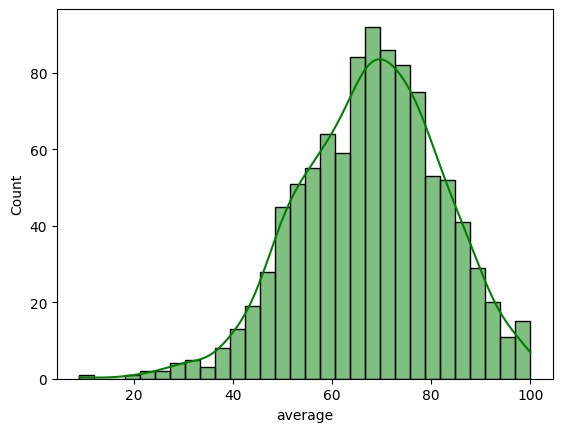

In [55]:
#visualization
sns.histplot(data=df,x='average',kde=True,bins=30,color='g')

<Axes: xlabel='average', ylabel='Count'>

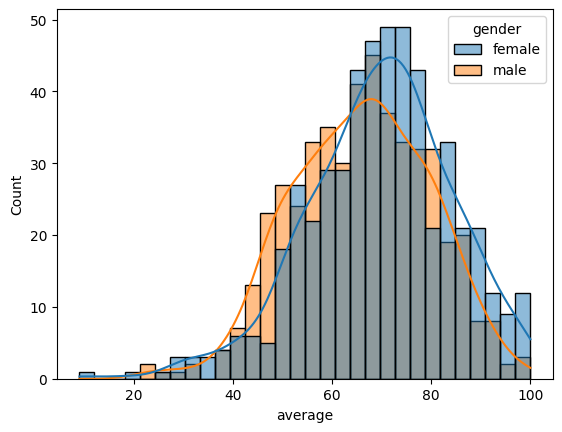

In [56]:
sns.histplot(data=df,x='average',kde=True,bins=30,hue='gender')

Insights:
Female students performed well than male students

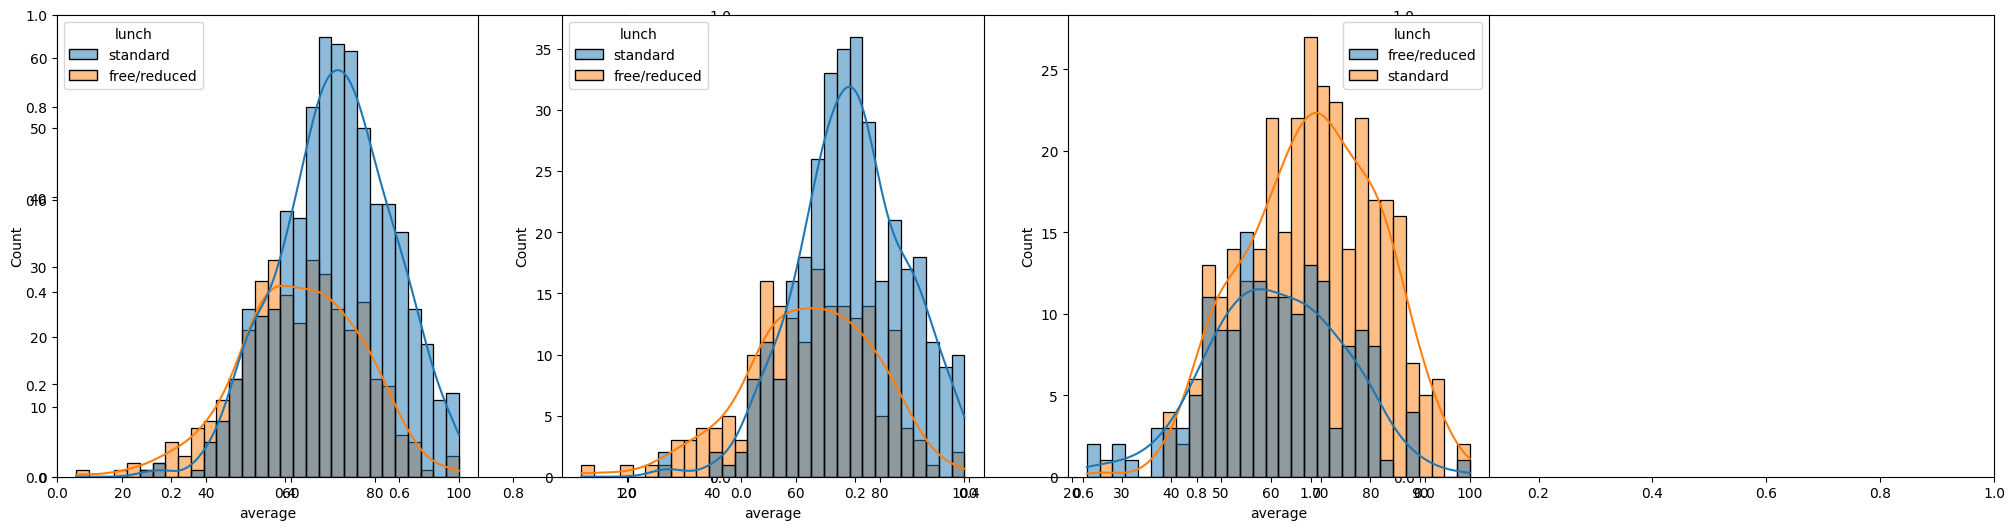

In [68]:
fig,axis=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, bins=30, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',bins=30,kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',bins=30,kde=True,hue='lunch')
plt.show()

Standard lunch helps the students to perform well

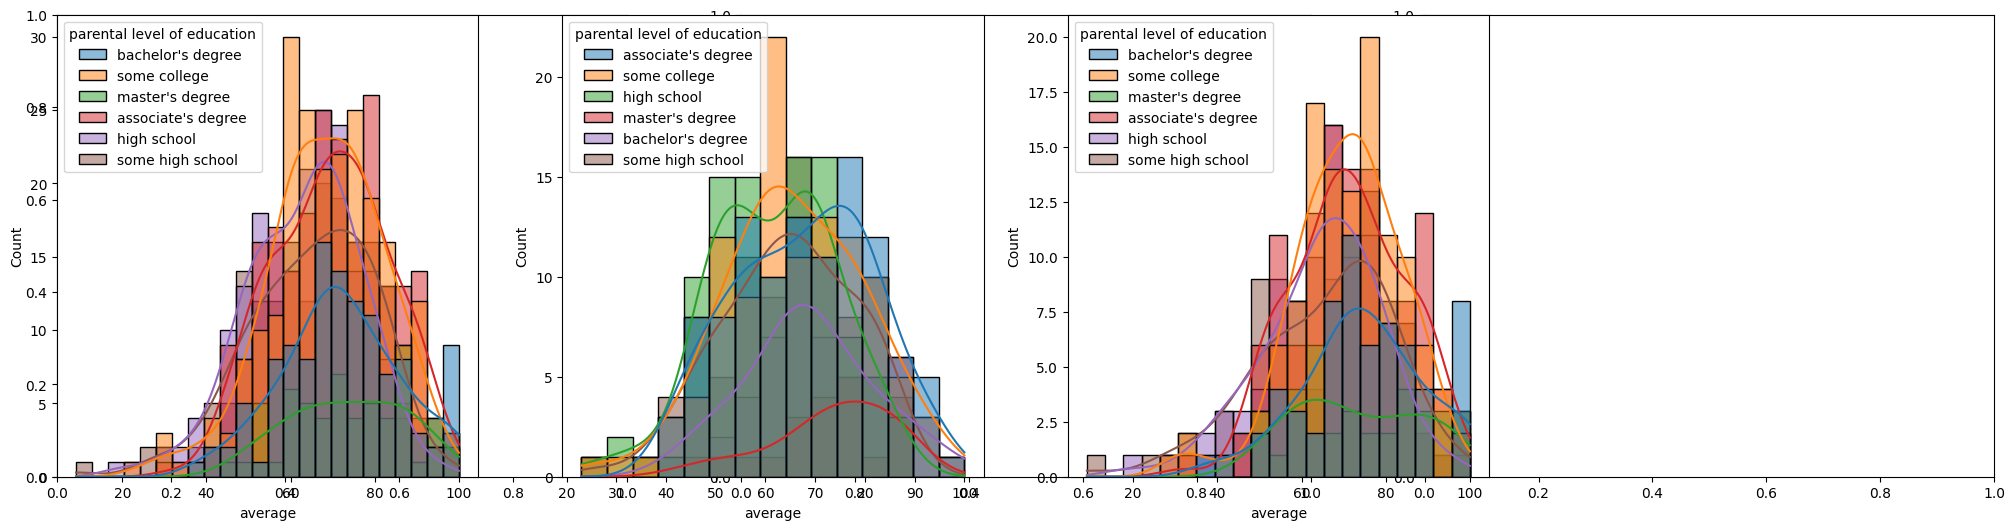

In [72]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

In general, parent's education is not hgelping students perform well in a exam.

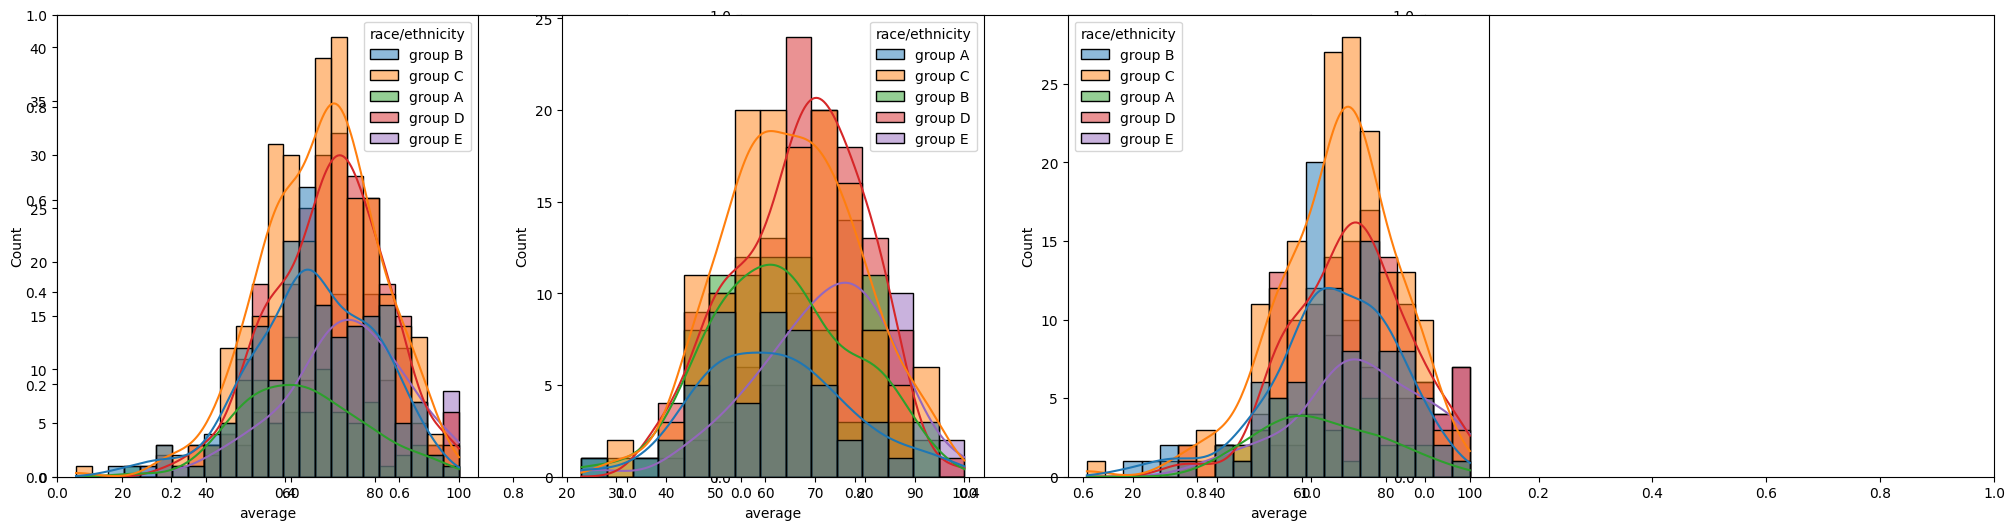

In [73]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.show()

Group A students are performing bad irrespective of gender